In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as wb
# facilitates plotting matplotlib graphs just below code cells and storing them in the notebook doc.
%matplotlib inline

C:\Users\ForPeople\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

In [3]:
for a in assets:
    pf_data[a] = wb.DataReader(a,data_source='yahoo',start='2010-1-1')['Adj Close']

In [5]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,44.058792,1132.989990
2010-01-05,44.073223,1136.520020
2010-01-06,43.864162,1137.140015
2010-01-07,43.626297,1141.689941
2010-01-08,43.568630,1144.979980


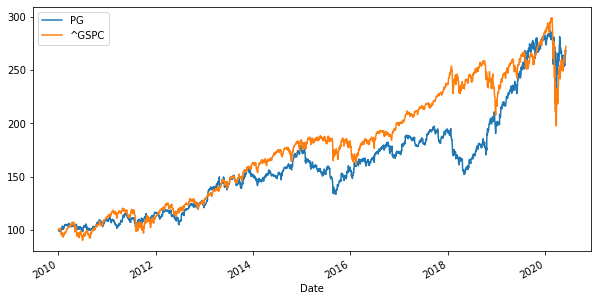

In [6]:
( pf_data / pf_data.iloc[0] * 100 ).plot(figsize=(10,5))

In [8]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns

,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.003111
2010-01-06,-0.004755,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878
...,...,...
2020-05-27,0.016466,0.014718
2020-05-28,0.018874,-0.002110
2020-05-29,-0.001207,0.004801


In [9]:
log_returns.mean() * 250

PG       0.094052
^GSPC    0.095452
dtype: float64

In [10]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029506,0.017841
^GSPC,0.017841,0.030281


In [11]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.596867
^GSPC,0.596867,1.000000


In [13]:
num_assets = len(assets)
num_assets

2

In [14]:
arr = np.random.random(2)
arr

array([0.76472776, 0.76233081])

In [16]:
arr[0] + arr[1]

1.527058568839256

In [17]:
#Generating 2 random numbers where sum is always equal to 1
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.9043489, 0.0956511])

In [18]:
weights[0] + weights[1]

1.0

In [19]:
# expected portfolio return
np.sum(weights * log_returns.mean()) * 250

0.09418616405521131

In [21]:
#expected portfolio variance
np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))

0.02749502614277821

In [24]:
#expected portfolio volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.16581624209581586

In [26]:
# 1000 combinations
pfolio_returns = []
pfolio_volatilities = []
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.09467370056756948,
  0.09491537850147354,
  0.09489494014869554,
  0.09505265487844707,
  0.09428640300155512,
  0.09461144646260262,
  0.09471585518397474,
  0.09473474498749408,
  0.09454380193981164,
  0.09513967431332981,
  0.09458097488347982,
  0.09498638678102793,
  0.09521556930891015,
  0.09481794711856323,
  0.09515499619428341,
  0.09412152996091705,
  0.09496956593599867,
  0.09415446021041779,
  0.09454545765116348,
  0.09544957991849196,
  0.09475000795723448,
  0.09465074030216893,
  0.09463975265846088,
  0.09496294334441024,
  0.0945973375074698,
  0.0948427514022944,
  0.09459990179860903,
  0.09440644684317208,
  0.09501791823046321,
  0.09423477709659879,
  0.09481545550862869,
  0.09480743729123857,
  0.09461136546472718,
  0.09417227771207404,
  0.0948551372646149,
  0.09506788486704769,
  0.09476094592501819,
  0.09514454595387466,
  0.09456008638437279,
  0.09467230282219462,
  0.09449998283145863,
  0.09467133099722803,
  0.09472662255768918,
  0.0944878409

In [27]:
# converting list to arrays
pfolio_returns = []
pfolio_volatilities = []
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
ptfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities

(array([0.09413959, 0.09505003, 0.0943049 , 0.09538378, 0.09460924,
        0.0940773 , 0.09494317, 0.09430098, 0.0947776 , 0.09457709,
        0.09461855, 0.09458686, 0.09484704, 0.09499364, 0.09476298,
        0.09511414, 0.0953617 , 0.09436347, 0.09454429, 0.09441368,
        0.09510186, 0.09421148, 0.09411433, 0.09429287, 0.09466741,
        0.09519286, 0.09425365, 0.09409881, 0.09529374, 0.09439038,
        0.09444831, 0.09476722, 0.09493957, 0.0946895 , 0.0946494 ,
        0.09504613, 0.09466495, 0.09461905, 0.09503944, 0.09496069,
        0.09478648, 0.0945569 , 0.09479006, 0.0942999 , 0.09445757,
        0.09451737, 0.09410497, 0.09458974, 0.09523277, 0.09517496,
        0.0947427 , 0.09446945, 0.09472032, 0.09438316, 0.09464936,
        0.09484013, 0.09406002, 0.09438625, 0.09450887, 0.09461271,
        0.0947397 , 0.09537264, 0.09468729, 0.09503659, 0.09503588,
        0.09462854, 0.09495043, 0.09448049, 0.09462136, 0.0948948 ,
        0.09504997, 0.09466372, 0.09438989, 0.09

In [28]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [29]:
portfolios.head()

,Return,Volatility
0,0.094140,0.167763
1,0.095050,0.158508
2,0.094305,0.161495
3,0.095384,0.170669
4,0.094609,0.155046


In [30]:
portfolios.tail()

,Return,Volatility
995,0.094208,0.164952
996,0.094501,0.156534
997,0.094770,0.154534
998,0.094662,0.154655
999,0.094693,0.154524


Text(0, 0.5, 'Expected Return')

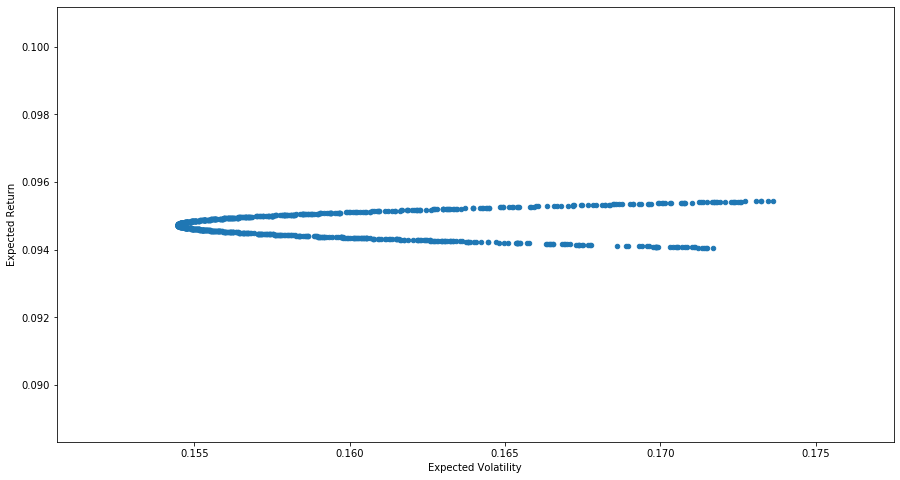

In [32]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,8));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')